# Deque

*Data Structures and Information Retrieval in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)

[Click here to run this chapter on Colab](https://colab.research.google.com/github/AllenDowney/DSIRP/blob/main/chapters/deque.ipynb)

## Double-ended Queue

With Python lists, we can add and remove elements from the *end* of the list in constant time, but adding and removing from the beginning takes linear time.
That's because Python lists are implemented using arrays that grow dynamically. 

With linked lists, we can add and remove elements from the *beginning* of the list in constant time, but adding and removing from the end takes linear time.

With either of these implementations, it is easy to make a stack, that is, a collection where the first element we add is the last element we remove. A stack is also called a "first-in, last-out" queue, abbreviated FILO.

But it is not easy to implement a "first-in, first-out" queue, that is, a collection where the first element we add is the *first* element we remove.

Fortunately, there are ways to implement lists that can add and remove elements from both ends in constant time.
A collection that has this property is called a double-ended queue, abbreviated "deque" and pronounced like "deck".

One way to implement a deque is a doubly-linked list, also known as a "head-tail linked list".
Each node in a doubly-linked list has a reference to the previous node in the list as well as the next element, which I will call `left` and `right`.


In [1]:
class Node:
    def __init__(self, data, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right
        
    def __repr__(self):
        return f'Node({self.data})'

We can create nodes like this:

In [2]:
node1 = Node(1)
node2 = Node(2)
node3 = Node(3)

node1

Node(1)

And then link them up, like this:

In [3]:
node1.right = node2
node2.right = node3

node2.left = node1
node3.left = node2

To traverse the list from left to right, we can start at the beginning and follow the `right` links.

In [4]:
node = node1
while node:
    print(node)
    node = node.right

Node(1)
Node(2)
Node(3)


To traverse from right to left, we start and the end and follow the `left` links.

In [5]:
node = node3
while node:
    print(node)
    node = node.left

Node(3)
Node(2)
Node(1)


## Deque objects

For some operations, it will be convenient to have another object that represents the whole list (as opposed to one of its nodes).

Here's the class definition.

In [6]:
class Deque:
    def __init__(self, head=None, tail=None):
        self.head = head
        self.tail = tail
        
    def __repr__(self):
        return f'LinkedList({self.head}, {self.tail})'

Now we can create a `Deque` with references to `node1` and `node3`:

In [7]:
deque = Deque(node1, node3)
deque

LinkedList(Node(1), Node(3))

For debugging purposes, I'll use the following function, which prints the list from right to left and then left to right, which confirms that all of the links are correct.

In [8]:
def print_deque(deque):
    node = deque.head
    while node:
        print(node.data, end=', ')
        node = node.right
    print()
    
    node = deque.tail
    while node:
        print(node.data, end=', ')
        node = node.left
    print()

Here's an example.

In [9]:
print_deque(deque)

1, 2, 3, 
3, 2, 1, 


## Push

Now let's see how we can add and remove elements from the beginning and end in constant time.
We'll start with the push operations.

If we start with an empty deque, adding the first node is a special case, so I'll pull that into a function.

In [10]:
def push_first(deque, value):
    deque.head = deque.tail = Node(value, None, None)

Here's an example.

In [11]:
deque = Deque()
push_first(deque, 1)
print_deque(deque)

1, 
1, 


**Exercise:**  Write `left_push`, which takes a `Deque` object and a new value, and adds the value to the beginning of the deque.

If the queue is empty, it should call `push_first` to handle the special case; otherwise it should handle the general case.

In [12]:
# Solution

def left_push(deque, value):
    if deque.head is None:
        return push_first(deque, value)
    
    head = deque.head
    deque.head = head.left = Node(value, None, head)

You can use the following examples to test your function:

In [13]:
deque = Deque()
left_push(deque, 2)
print_deque(deque)

2, 
2, 


In [14]:
left_push(deque, 1)
print_deque(deque)

1, 2, 
2, 1, 


**Exercise:**  Write `right_push`, which takes a `Deque` object and a new value, and adds the value to the end of the deque.

If the queue is empty, it should call `push_first` to handle the special case; otherwise it should handle the general case.

In [15]:
# Solution

def right_push(deque, value):
    if deque.head is None:
        return push_first(deque, value)
    
    tail = deque.tail
    deque.tail = tail.right = Node(value, tail, None)

You can use the following examples to test your function:

In [16]:
deque = Deque()
right_push(deque, 3)
print_deque(deque)

3, 
3, 


In [17]:
right_push(deque, 4)
print_deque(deque)

3, 4, 
4, 3, 


## Pop

To pop elements from the deque, we have to handle two special cases:

* If `head` and `tail` are both `None`, the deque is empty and we should raise a `ValueError`.

* If `head` and `tail` refer to the same `Node`, there is only one element, so we should remove it and leave the deque empty.

The following function handles these cases.

In [35]:
def pop_last(deque):
    if deque.head is None:
        raise ValueError('Tried to pop from empty deque')
    
    old_head = deque.head
    deque.head = deque.tail = None
    return old_head.data

We can test it like this:

In [36]:
deque = Deque()
left_push(deque, 1)
pop_last(deque)

1

In [37]:
print_deque(deque)

**Exercise:**  Write `left_pop`, which takes a `Deque` object, remove the first node, and return the first data value.

If the queue is empty or has a single element, it should call `pop_last` to handle the special case; otherwise it should handle the general case.

In [49]:
# Solution

def left_pop(deque):
    if deque.head == deque.tail:
        return pop_last(deque)
    
    old_head = deque.head
    new_head = old_head.right
    new_head.left = None
    deque.head = new_head
    return old_head.data

You can use the following example to test your code.

In [54]:
deque = Deque()
left_push(deque, 2)
left_push(deque, 1)
print_deque(deque)

1, 2, 
2, 1, 


In [55]:
left_pop(deque)

1

Check to see whether the remaining list is well-formed.

In [56]:
print_deque(deque)

2, 
2, 


In [57]:
left_pop(deque)

2

In [58]:
try:
    left_pop(deque)
except ValueError as e:
    print(e)

Tried to pop from empty deque


**Exercise:**  Write `right_pop`, which takes a `Deque` object, remove the last node, and return the last data value.

If the queue is empty or has a single element, it should call `pop_last` to handle the special case; otherwise it should handle the general case.

In [68]:
# Solution

def right_pop(deque):
    if deque.head == deque.tail:
        return pop_last(deque)
    
    old_tail = deque.tail
    new_tail = old_tail.left
    new_tail.right = None
    deque.tail = new_tail
    return old_tail.data

You can use the following examples to test your function.

In [69]:
deque = Deque()
left_push(deque, 2)
left_push(deque, 1)
print(deque)

LinkedList(Node(1), Node(2))


In [70]:
right_pop(deque)

2

In [71]:
print_deque(deque)

1, 
1, 


In [72]:
right_pop(deque)

1

In [73]:
try:
    right_pop(deque)
except ValueError as e:
    print(e)

Tried to pop from empty deque


## collections.deque

The Python collections module provides an implementation of a deque.
You can read the 
[documentation here](https://docs.python.org/3/library/collections.html#collections.deque)
and the
[source code here](https://github.com/python/cpython/blob/d943d19172aa93ce88bade15b9f23a0ce3bc72ff/Modules/_collectionsmodule.c).

To confirm that it can add and remove elements from the beginning and end in constant time, let's run some timing tests.

In [74]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/DSIRP/raw/main/timing.py')

In [75]:
from collections import deque

def appendleft(n):
    d = deque()
    [d.appendleft(x) for x in range(n)]

In [76]:
def popleft(n):
    d = deque()
    [d.appendleft(x) for x in range(n)]    
    [d.popleft() for _ in range(n)]

In [77]:
from timing import run_timing_test

ns, ts = run_timing_test(appendleft)

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.0
32768 0.009999999999999787
65536 0.0
131072 0.010000000000000675
262144 0.019999999999999574
524288 0.03000000000000025
1048576 0.07000000000000028
2097152 0.11999999999999922
4194304 0.27000000000000046
8388608 0.54
16777216 1.0700000000000003


In [41]:
def append(n):
    d = deque()
    [d.append(x) for x in range(n)]

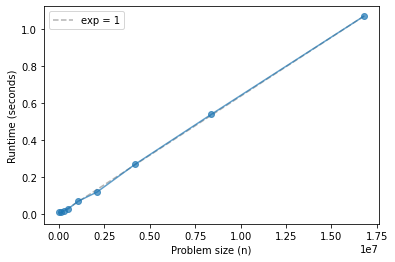

In [78]:
from timing import plot_timing_test

plot_timing_test(ns, ts, scale='linear')

Running these operations `n` times is linear in `n`, which means that each one is constant time, at least on average.

**Exercise:** Modify the examples above to confirm that `append` and `pop` are also constant time.